In [1]:
from IPython.display import display

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

import mglearn

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

from sklearn.datasets import load_iris

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import QuantileTransformer, StandardScaler

from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header = None 으로 지정하고
# 'names' 매개변수로 열 이름을 제공한다.
data = pd.read_csv(
        os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'),
        header = None, index_col = False,
        names =['age', 'workclass', 'fnlwgt', 'education', 'education_num',
               'martial-status', 'occupation', 'relationship', 'race', 'gender',
               'capital-gain', 'capital-loss', 'hours-per-week', 'native-conutry',
               'income'])
# 예제를 위해 몇개의 열만 선택한다.
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
#IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만든다.
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
print('원본 특성: \n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('get_dummies 후의 특성:\n', list(data_dummies.columns))

원본 특성: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_

In [5]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

In [7]:
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values

In [8]:
print('X.shape: {} y.shape: {}'.format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=0)
logreg =LogisticRegression()
logreg.fit(X_train, y_train)
print('테스트 점수:{:.2f}'.format(logreg.score(X_test, y_test)))

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


테스트 점수:0.81


In [11]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만든다.
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1],
                       '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [12]:
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [13]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [14]:
from sklearn.preprocessing import OneHotEncoder
# sparse =False 로 설정하면 OneHotEncoder 가 회소 행렬이 아니라 넘파이 배열을 반환한다.
ohe = OneHotEncoder(sparse= False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [15]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [16]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [('scaling', StandardScaler(), ['age', 'hours-per-week']),
    ('onehot', OneHotEncoder(sparse = False),
    ['workclass', 'education', 'gender', 'occupation'])])

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# income 을 제외한 모든 열을 추출한다.
data_features = data.drop('income', axis =1)
# 데이터 프레임과 inccome을 분할 한다.
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state = 0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [19]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print('테스트 점수: {:.2f}'.format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
ct.named_transformers_.onehot

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [21]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse =False)))

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [22]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    ( StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse = False), ['workclass', 'education', 'gender', 'occupation']))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

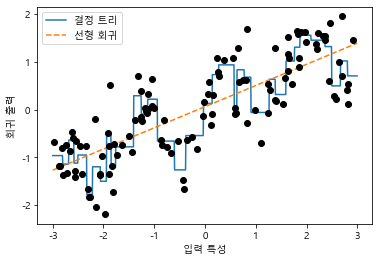

In [24]:
X, y = mglearn.datasets.make_wave(n_samples =120)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X,y)
plt.plot(line, reg.predict(line), label = '결정 트리')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label = '선형 회귀')
plt.plot(X[:,0], y, 'o', c= 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best')

In [25]:
from sklearn.preprocessing import KBinsDiscretizer

In [26]:
kb = KBinsDiscretizer(n_bins =10, strategy = 'uniform')
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [27]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [28]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [29]:
kb = KBinsDiscretizer(n_bins = 10, strategy ='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, '입력 특성')

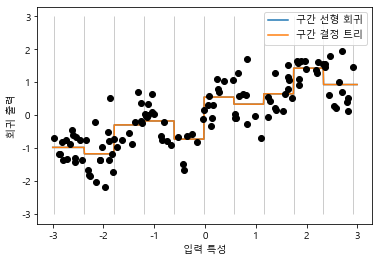

In [30]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = '구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split =3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = '구간 결정 트리')
plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc= 'best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')

In [31]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


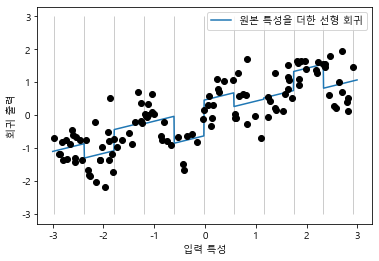

In [32]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = '원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc = 'best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:,0], y, 'o', c='k')

In [33]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(120, 20)


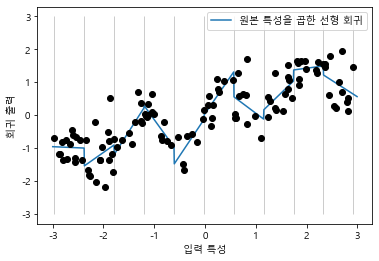

In [34]:
reg = LinearRegression(). fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = '원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth =1, alpha =.2)

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best')

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가한다.
# 기본값인 'include_bias = True'는 절편에 해당하는 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [36]:
X_poly

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01, ...,
         1.03097700e-01, -7.76077513e-02,  5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01, ...,
         2.86036036e+03,  7.73523202e+03,  2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00, ...,
         1.40936394e+01,  1.96178338e+01,  2.73073115e+01],
       ...,
       [-1.88057965e+00,  3.53657981e+00, -6.65082000e+00, ...,
         1.56434973e+02, -2.94188426e+02,  5.53244767e+02],
       [ 2.35535399e+00,  5.54769242e+00,  1.30667795e+01, ...,
         9.47217033e+02,  2.23103142e+03,  5.25486876e+03],
       [ 2.36053451e-01,  5.57212320e-02,  1.31531891e-02, ...,
         9.64012886e-06,  2.27558569e-06,  5.37159857e-07]])

In [37]:
print('X_poly.shape', X_poly.shape)

X_poly.shape (120, 10)


In [38]:
print('X 원소:\n', X[:5])
print('X_poly d원소:\n', X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly d원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [39]:
print(' 항 이름:\n', poly.get_feature_names())

 항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


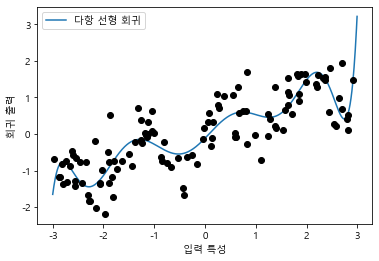

In [40]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best')

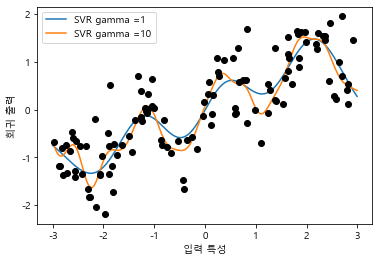

In [41]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label = 'SVR gamma ={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best')

In [42]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('X_train.shape:', X_train.shape)
print('X_train_poly.shape:', X_train_poly.shape)


X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [44]:
print('다항 특성 이름 :\n', poly.get_feature_names())

다항 특성 이름 :
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수 :{:.3f}'.format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print('상호작용 특성이 있을 때 점수 :{:.3f}'. format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수 :0.621
상호작용 특성이 있을 때 점수 :0.753


In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_scaled = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train_scaled, y_train)

print('상호 작용 특성이 없을 때 점수: .{:.3f}'.format(rf_scaled.score(X_test_scaled, y_test)))

rf_poly = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_poly, y_train)

print('상호 작용 특성이 있을 때 점수: .{:.3f}'.format(rf_poly.score(X_test_poly, y_test)))

상호 작용 특성이 없을 때 점수: .0.795
상호 작용 특성이 있을 때 점수: .0.774


### 4.6 일변량 비선형 변환

In [47]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000,3))
w = rnd.normal(size =3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [48]:
rnd

In [49]:
X_org

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       ...,
       [-1.30322008,  0.46675065,  0.16110632],
       [ 0.32003193,  2.07917666, -0.90746598],
       [-0.19240421, -1.21251574, -0.08059852]])

In [50]:
w

array([ 1.59327362,  0.5687224 , -0.11448705])

In [51]:
print('특성 출현 횟수: \n', np.bincount(X[:, 0]))

특성 출현 횟수: 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

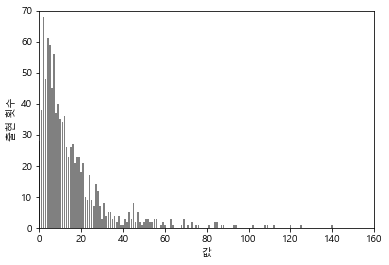

In [52]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color = 'grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

In [53]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.622


In [54]:
X_train_log = np.log(X_train +1)
X_test_log = np.log(X_test+1)

Text(0.5, 0, '값')

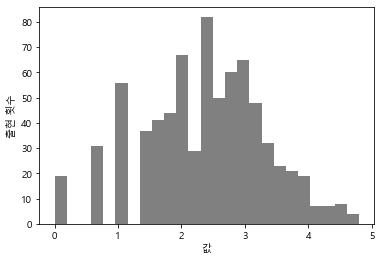

In [55]:
plt.hist(X_train_log[:,0], bins = 25, color = 'gray')
plt.ylabel('출현 횟수')
plt.xlabel('값')

In [56]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.875


## 4.7 특성 자동 선택

### 4.7.1 일변량 통계

In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [58]:
# 고정된 난수를 발생시킨다.
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))

In [59]:
# 데이터에 노이즈 특성을 추가한다.
# 처음 30개는 원본 특성이고 다음 50개는 노이즈다.
X_w_noise = np.hstack([cancer.data, noise])

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size =.5)

In [61]:
# f_classif(기본값)와 SelectPercentile 을 사용하여 특성의 50%을 선택한다.
select = SelectPercentile(score_func = f_classif, percentile = 50)
select.fit(X_train, y_train)
# 훈련세트에 적용한다.
X_train_selected = select.transform(X_train)

print('X_train.shape:', X_train.shape)
print('X_train_seleted.shape:', X_train_selected.shape)

X_train.shape: (284, 80)
X_train_seleted.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x27a53350cc0>],
 <a list of 1 Text yticklabel objects>)

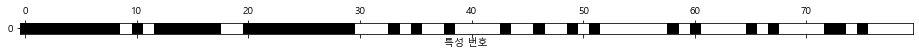

In [62]:
mask = select.get_support()
print(mask)
# True는 검은색, False 는 흰색으로 마스킹합니다.
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

In [63]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('전체 특성을 사용한 점수: {:.3f}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print('선택된 일부 특성을 사용한 점수: {:.3f}'.format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.7.2 모델 기반 특성 선택

In [64]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state = 42), threshold='median')

In [65]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape:', X_train.shape)
print('X_train_l1.shape:', X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, '특성 번호')

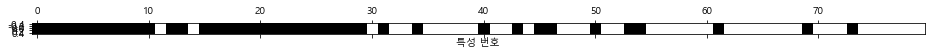

In [66]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다.
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('특성 번호')

In [67]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.951


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.7.3 반복적 특성 선택

Text(0.5, 0, '특성 번호')

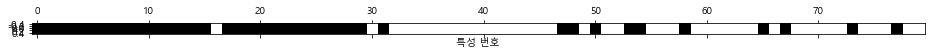

In [68]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select =40)

select.fit(X_train, y_train)
# 선택된 특성을 표시한다.
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('특성 번호')

In [69]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.951


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
print('테스트 점수: {:.3f}'.format(select.score(X_test, y_test)))

테스트 점수: 0.951


## 4.8 전문가 지식 활용

In [71]:
citibike = mglearn.datasets.load_citibike()

In [72]:
print('시티 바이크 데이터: \n', citibike.head())

시티 바이크 데이터: 
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여 횟수')

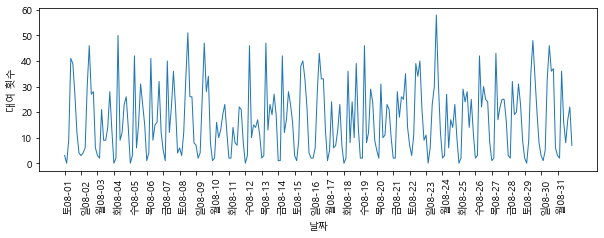

In [78]:
plt.figure(figsize = (10,3))
xticks = pd.date_range(start = citibike.index.min(), end = citibike.index.max(), freq = 'D')

week = ['일',' 월', '화','수','목','금','토']
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime('%w'),
                                             xticks.strftime('%m-%d'))]
plt.xticks(xticks, xticks_name, rotation = 90, ha= 'left')
plt.plot(citibike, linewidth=1)
plt.xlabel('날짜')
plt.ylabel('대여 횟수')

In [81]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# POSIX 시간을 10**9로 나누어 변환
X = citibike.index.astype('int64').values.reshape(-1,1) //10**9

In [88]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용한다.
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만든다.
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눈다.
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눈다.
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print('테스트 세트 R^2: {:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10,3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation =90, ha = 'left')
    
    plt.plot(range(n_train), y_train, label = '훈련')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='테스트')
    plt.plot(range(n_train), y_pred_train, '--', label='훈련예측')
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = '테스트 예측')
    plt.legend(loc = (1.01, 0))
    plt.xlabel('날짜')
    plt.ylabel('대여횟수')
    

테스트 세트 R^2: -0.04


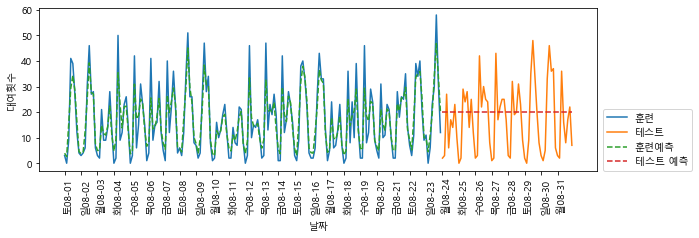

In [89]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
eval_on_features(X, y, regressor)

테스트 세트 R^2: 0.60


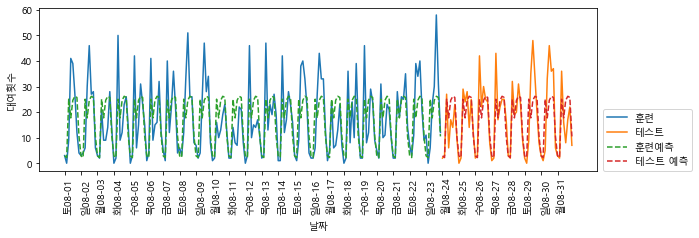

In [90]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y , regressor)

테스트 세트 R^2: 0.84


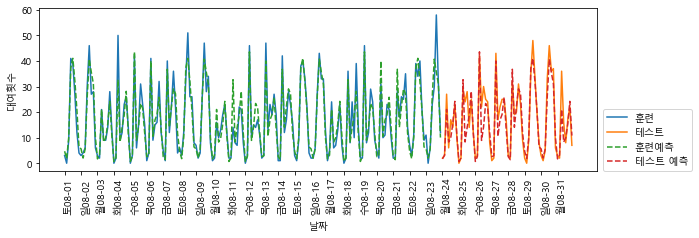

In [92]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y , regressor)

테스트 세트 R^2: 0.13


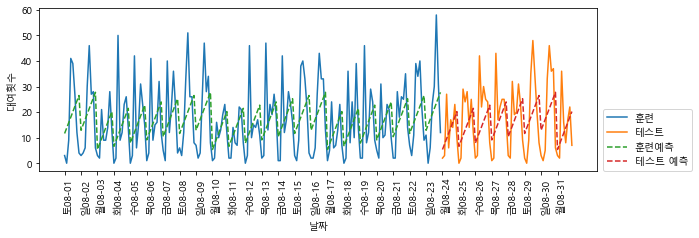

In [93]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())


In [94]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


테스트 세트 R^2: 0.62


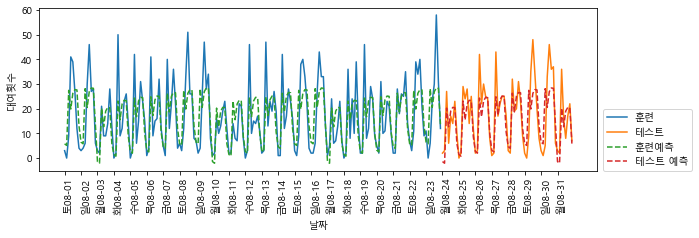

In [95]:
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.85


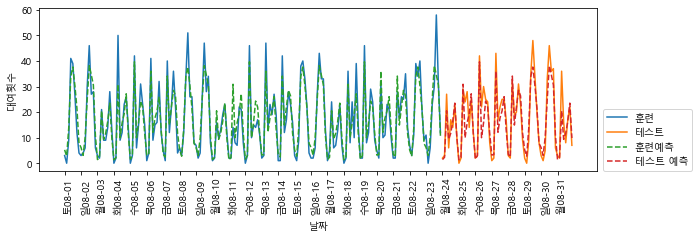

In [96]:
poly_transformer = PolynomialFeatures(degree =2, interaction_only = True,
                                     include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)


In [97]:
hour = ['%02d:00' % i for i in range(0,27,3)]
day = ['월','화','수','목','금','토','일']
features = day +hour

In [99]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_ !=0]

Text(0, 0.5, '계수 크기')

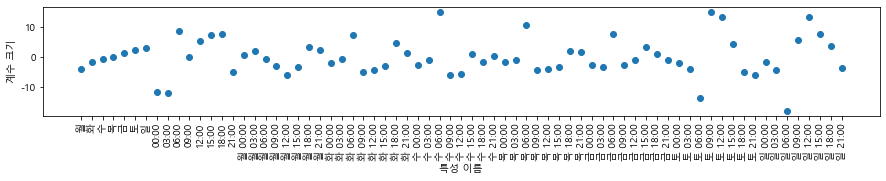

In [101]:
plt.figure(figsize = (15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('특성 이름')
plt.ylabel('계수 크기')